# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Data Loading

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.shape

(1470, 35)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Exploratory Data Analysis (EDA)

In [4]:
# View the first few rows of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Summary statistics of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Data Cleaning

In [6]:
# Delete redundant columns.
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
df.shape

(1470, 31)

In [7]:
# Check for duplicated values
df.duplicated().sum()

0

In [8]:
# Handling Missing Values
df.isnull().sum()  # Check for missing values in each column

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Feature Engineering

In [9]:
df['age_group'] = pd.cut(df['Age'], [18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56+'])

# Predict Employee Attrition

## Split

In [10]:
X = df[['YearsAtCompany', 'Age', 'MonthlyIncome']]  # Input features
y = df['Attrition']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train LR Model

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Make predictions on test set

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8673469387755102


# Data Visualization

### Correlation map for all numeric variables

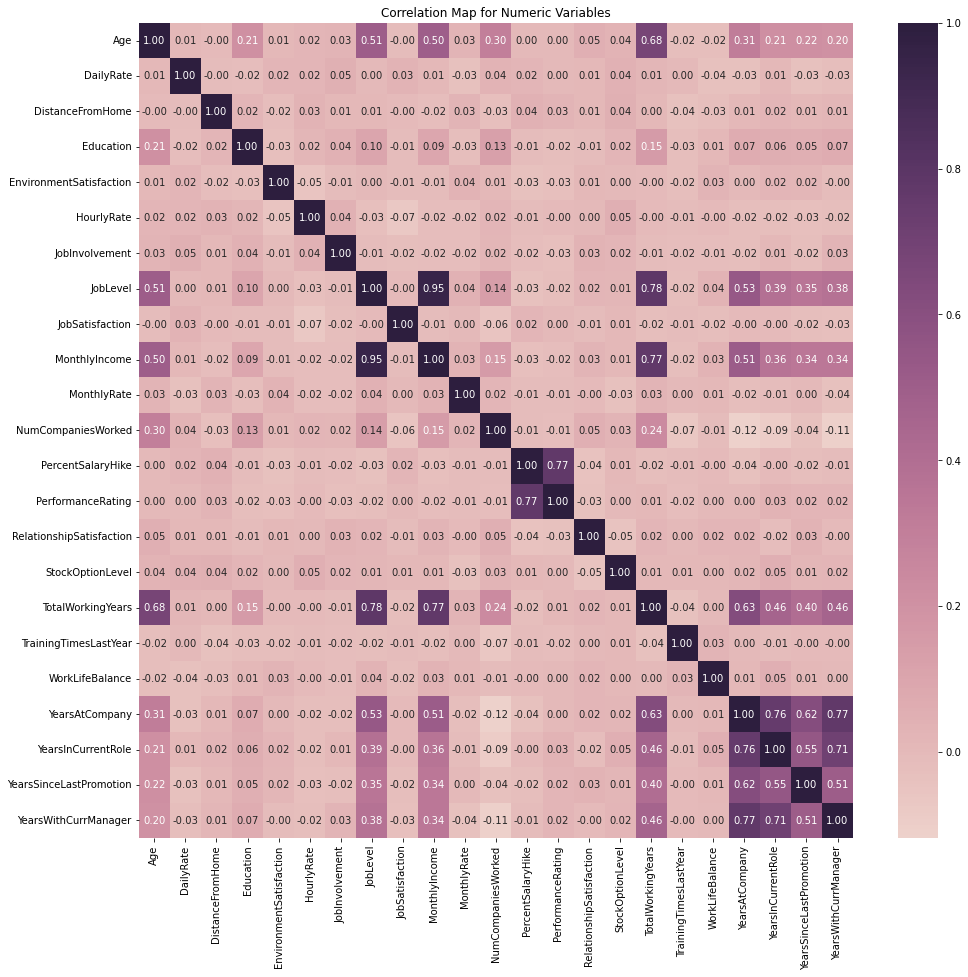

In [14]:
# Create correlation matrix
correlation_matrix = (df.select_dtypes(include=['number'])).corr()

# Plot heatmap of `correlation`
plt.figure(figsize=(16, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Map for Numeric Variables')
plt.show()

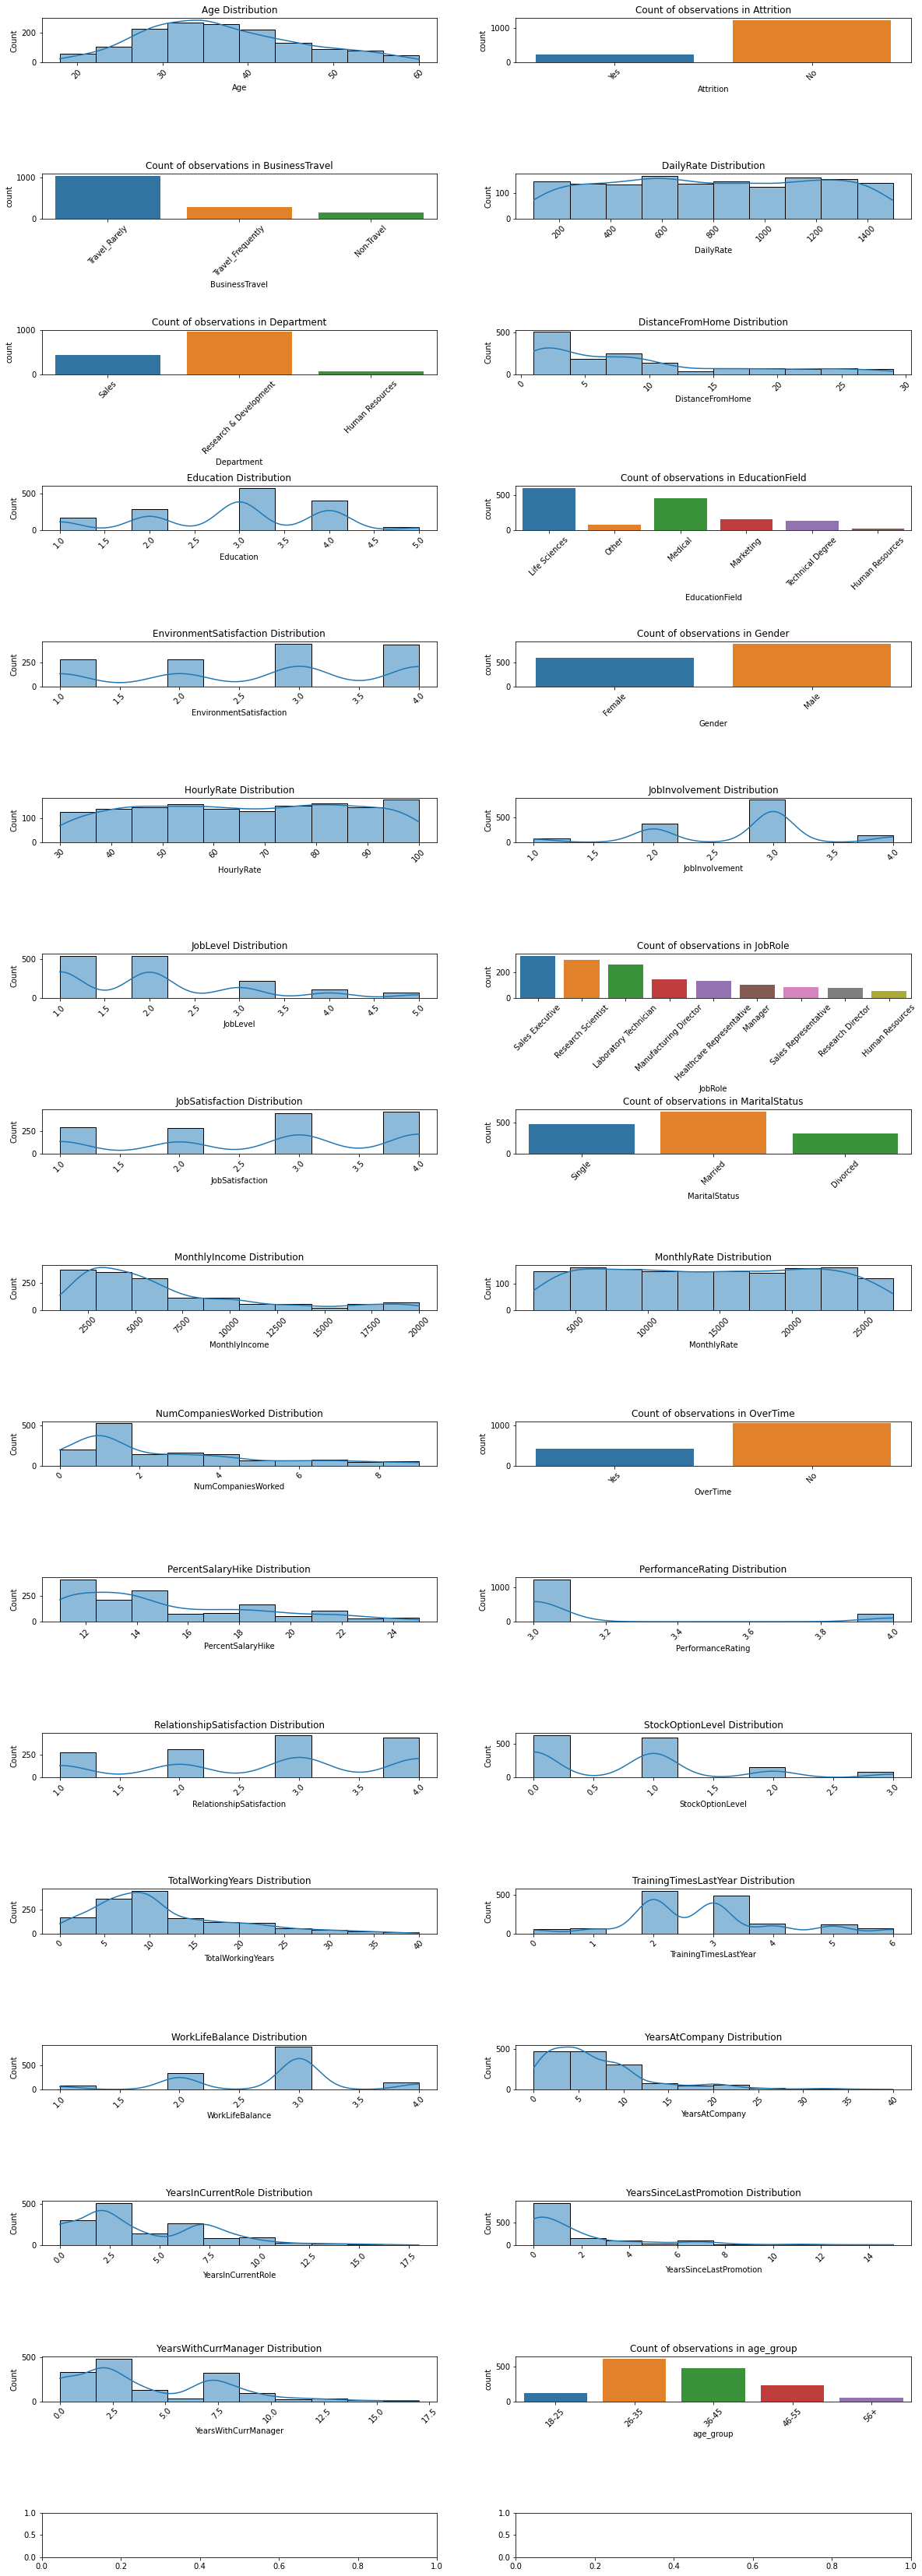

In [15]:
fig, axes = plt.subplots(len(df.columns)//2 +1, 2, figsize=(20, 60))

fig.subplots_adjust(hspace=2.5)
axes = axes.flatten()

# Create a loop to generate visualizations for all columns
for i, column in enumerate(df.columns):
    plt.sca(axes[i])
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        sns.histplot(df[column], bins=10, kde=True, ax=axes[i])
        plt.title(f'{column} Distribution')
    else:
        sns.countplot(x=column, data=df, ax=axes[i])
        plt.title(f'Count of observations in {column}')
    plt.xlabel(column)
    plt.xticks(rotation=45)

# Remove any empty subplot if the number of columns is odd
if len(df.columns) % 2 != 0:
    fig.delaxes(axes[-1])
    
plt.show()

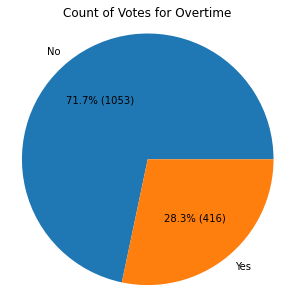

In [16]:
Overtime_Votes = df['OverTime'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(Overtime_Votes, labels=Overtime_Votes.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(Overtime_Votes)/100)})')
plt.title('Count of Votes for Overtime')
plt.axis('equal')
plt.show()

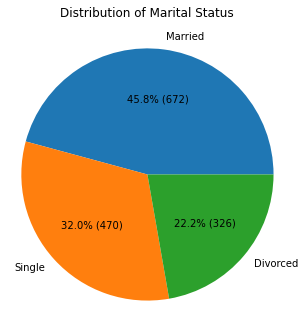

In [17]:
marital_status_counts = df['MaritalStatus'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=marital_status_counts.index, 
        autopct=lambda p:f'{p:.1f}% ({int(p*sum(marital_status_counts)/100)})')
plt.title('Distribution of Marital Status\n')
plt.axis('equal')
plt.show()

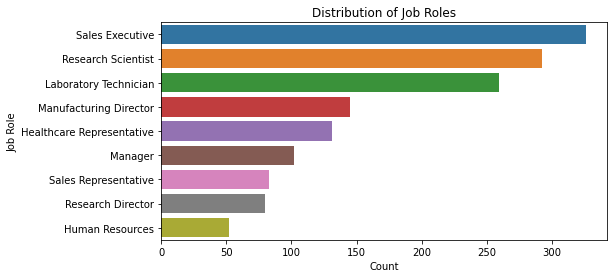

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(y='JobRole', data=df, order=df['JobRole'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.show()

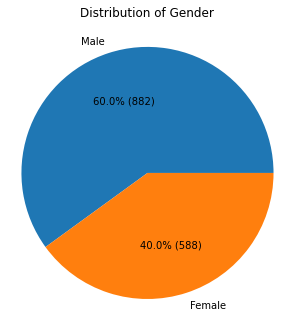

In [19]:
Gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(Gender_counts)/100)})')
plt.title('Distribution of Gender\n')
plt.axis('equal')
plt.show()

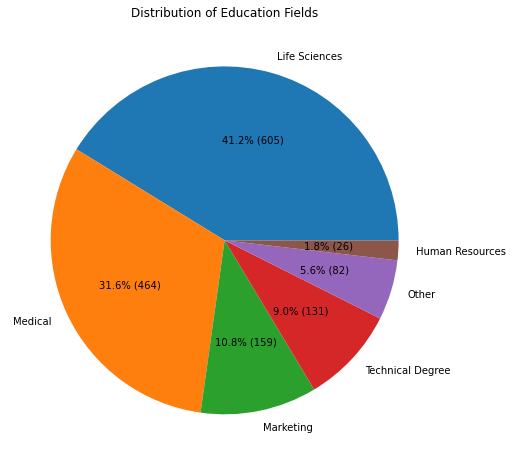

In [20]:
education_field_counts = df['EducationField'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(education_field_counts, labels=education_field_counts.index, 
        autopct=lambda p:f'{p:.1f}% ({int(p*sum(education_field_counts)/100)})')
plt.title('Distribution of Education Fields')
plt.show()

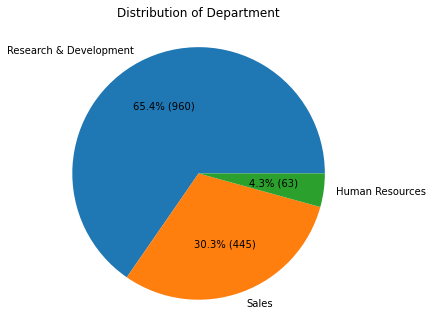

In [21]:
Department_counts = df['Department'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(Department_counts, labels=Department_counts.index, autopct=lambda p:f'{p:.1f}% ({int(p*sum(Department_counts)/100)})')
plt.title('Distribution of Department\n')
plt.axis('equal')
plt.show()

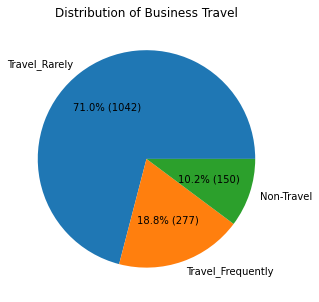

In [22]:
plt.figure(figsize=(5, 5))
business_travel_counts = df['BusinessTravel'].value_counts()
plt.pie(business_travel_counts, labels=business_travel_counts.index, 
        autopct=lambda p:f'{p:.1f}% ({int(p * sum(business_travel_counts)/100)})')
plt.title('Distribution of Business Travel')
plt.show()

### Relation between Overtime and Age

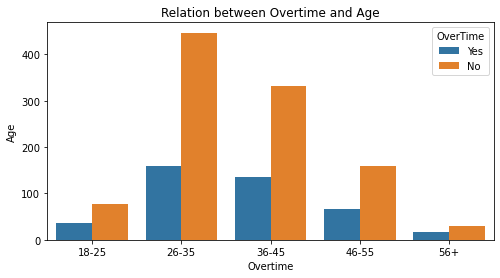

In [23]:
plt.figure(figsize=(8, 4))
sns.countplot(x='age_group', hue='OverTime', data=df)
plt.title('Relation between Overtime and Age')
plt.xlabel('Overtime')
plt.ylabel('Age')
plt.xticks()
plt.show()

### Relation between Education and Attrition

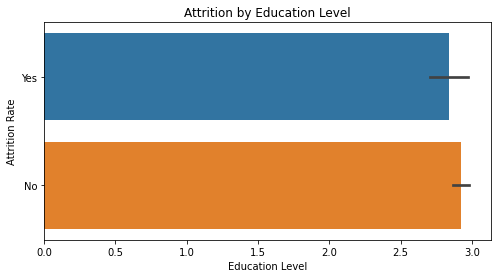

In [24]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Education', y='Attrition', data=df)
plt.title('Attrition by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Attrition Rate')
plt.show()

### Relation between Department and MonthlyIncome 

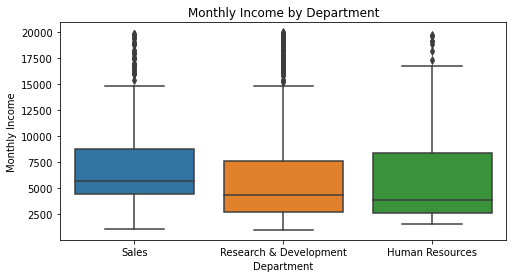

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Department', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks()
plt.show()

### Relation between Employee Attrition and Age

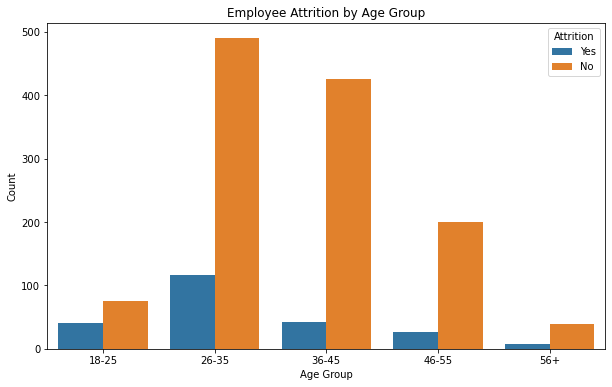

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='Attrition', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Employee Attrition by Age Group')
plt.show()